# Lab 11 - Skewness and Correlation - Annette Bazan

### Introduction:
1. Context:
2. Objectives:
3. Data Description: a short description about the name of each column
   - Distance: Distance of the house from the central business district
   - SellerG: Name of the seller agent
   - Type: Type of housing(townhome,house)
   - Method: The method of sale
   - Propertycount: Property in each surburb

### Importing Libraries

In [5]:
# importing General Libraries
import pandas as pd
import numpy as np
import math

# Data Viz libraries
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [6]:
# Load the dataset and name it df
df = pd.read_csv('housing.csv')

In [7]:
# Copy the dataset
housing=df.copy()

In [9]:
# Check the copy
housing.head().T

,0,1,2,3,4
Suburb,Abbotsford,Airport West,Albert Park,Albert Park,Alphington
Address,68 Studley St,154 Halsey Rd,105 Kerferd Rd,85 Richardson St,30 Austin St
Rooms,2,3,2,2,3
Type,h,t,h,h,h
Method,SS,PI,S,S,SN
SellerG,Jellis,Nelson,hockingstuart,Thomson,McGrath
Date,3/9/2016,3/9/2016,3/9/2016,3/9/2016,3/9/2016
Distance,2.5,13.5,3.3,3.3,6.4
Postcode,3067.0,3042.0,3206.0,3206.0,3078.0
Bedroom,2.0,3.0,2.0,2.0,3.0


In [10]:
housing.shape

(34857, 22)

In [11]:
housing.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG', 'Date',
       'Distance', 'Postcode', 'Bedroom', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Latitude', 'Longtitude',
       'Regionname', 'Propertycount', 'ParkingArea', 'Price'],
      dtype='object')

In [12]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Method         34857 non-null  object 
 5   SellerG        34857 non-null  object 
 6   Date           34857 non-null  object 
 7   Distance       34856 non-null  float64
 8   Postcode       34856 non-null  float64
 9   Bedroom        26640 non-null  float64
 10  Bathroom       26631 non-null  float64
 11  Car            26129 non-null  float64
 12  Landsize       23047 non-null  float64
 13  BuildingArea   13760 non-null  object 
 14  YearBuilt      15551 non-null  float64
 15  CouncilArea    34854 non-null  object 
 16  Latitude       26881 non-null  float64
 17  Longtitude     26881 non-null  float64
 18  Region

In [14]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03
Latitude,26881.0,-3.781063e+01,0.090279,-38.19043,-37.86295,-37.8076,-3.775410e+01,-3.739020e+01
Longtitude,26881.0,1.450019e+02,0.120169,144.42379,144.93350,145.0078,1.450719e+02,1.455264e+02


In [15]:
housing.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom           8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21097
YearBuilt        19306
CouncilArea          3
Latitude          7976
Longtitude        7976
Regionname           0
Propertycount        3
ParkingArea          0
Price             7610
dtype: int64

In [16]:
# (see in the final exam) Renaming some columns: SellerG, Postcode, BuildingArea, YearBuilt, Regionname, ParkingArea
housing = housing.rename(columns = {'SellerG':'Seller_Agent','Postcode':'Post_Code','BuildingArea':'Building_Area',
                                    'YearBuilt':'Year_Built','Regionname':'Region_Name','ParkingArea':'Parking_Area'})


In [27]:
# checking for any duplicated rows
housing.duplicated().sum()

0

In [29]:
# Let's suppose that there are duplicated rows
# We need to get rid of them
#'''housing.drop_duplicates(inplace=True)'''

In [30]:
housing.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'Seller_Agent', 'Date',
       'Distance', 'Post_Code', 'Bedroom', 'Bathroom', 'Car', 'Landsize',
       'Building_Area', 'Year_Built', 'CouncilArea', 'Latitude', 'Longtitude',
       'Region_Name', 'Propertycount', 'Parking_Area', 'Price'],
      dtype='object')

### Univariate Analysis
1. Performing Analysis on one variable
2. The key point is that there is only one variable in the dataset
3. For this reason we will use "Distance" for the univariate analysis.

In [31]:
housing_1 = housing['Distance']
housing_1.head()

0     2.5
1    13.5
2     3.3
3     3.3
4     6.4
Name: Distance, dtype: float64

In [32]:
housing_1.shape

(34857,)

In [33]:
len(housing_1)

34857

In [34]:
housing_1.isnull().sum()

1

In [35]:
housing_1.dropna(inplace=True)

In [36]:
housing_1.isnull().sum()

0

In [37]:
# duplicated rows (final exam)
housing_1.duplicated().sum()

34641

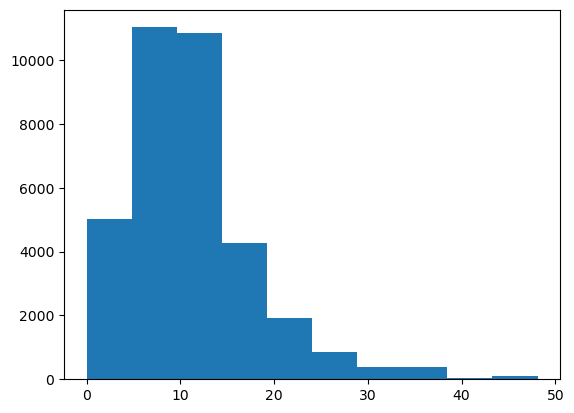

In [39]:
# Data distribution: Visualization
plt.hist(housing['Distance']);

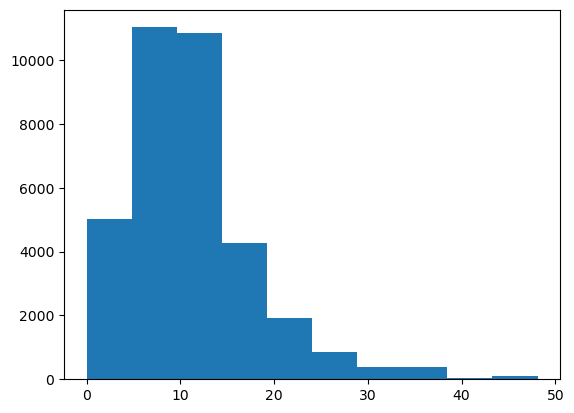

In [40]:
# Data distribution: Visualization
# Right Skewed the mean is larger than the median
plt.hist(housing_1);

### Examining the Skewness in Distance Univariate Dataset using Statistical Measures
1. Mean: Average of a variable
2. Median: The middle value in a variable
3. Mode: The most frequent values in a variable
4. Let's plot the skewness in the Distance variable

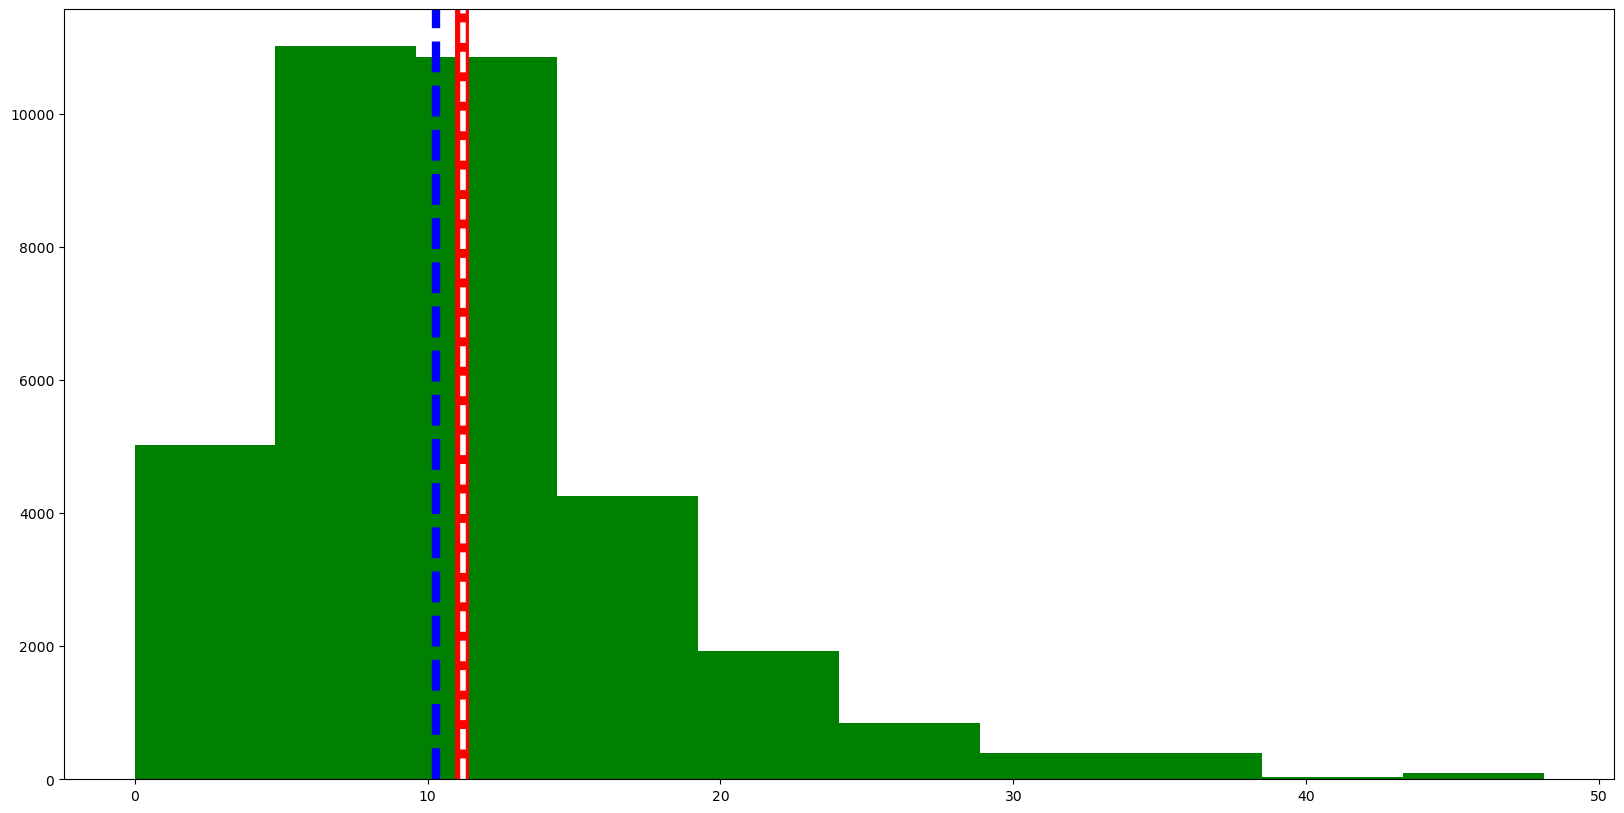

In [43]:
# Step 1. Setting the size of the plot
plt.figure(figsize=(20,10))

# Step 2. Creating a simple histogram with green color
plt.hist(housing_1, color = 'g')

# Step 3. Calculating the mean() for Distance, giving the mean line a red color
plt.axvline(housing_1.mean(), color ='r', linewidth = 10);

# Step 4. Calculating the median() giving the median line a blue color, a dashed style
plt.axvline(housing_1.median(),color = 'b',linewidth = 6, linestyle = 'dashed')

# Step 5. Calculating the mode() giving the mode line a white color, a dashed style
plt.axvline(housing_1.mode()[0],color = 'w',linewidth = 4, linestyle = 'dashed');

### Conclusion: (type 19 points)

##### End of Lab 11